Project Goals: In this project we aim to lower the default rate on loans by using machine learning to predict who will default on their loan. We'll compare both H2O and scikit-learn random forests to see which performs better.

A high-level overview of the project is:
* EDA and understanding the data
* Feature engineering and preparing the data
* Fitting and optimizing random forest models from sklearn and H2O to the data
* Evaluate performance of the best model, compare with the hand-coded method, and prepare a report with the results

# EDA and understanding the data

# 1. Load data into a DataFrame

In [1]:
# Download the latest version pandas_profiling package

import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import normalized_mutual_info_score
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# makes plots show up without calling plt.show()
%matplotlib inline
# display all columns
pd.set_option("display.max_columns", None)

In [4]:
# load data
df = pd.read_csv(r'C:\Users\Admin\Desktop\LoanDefault\Data\loan_data.csv\George_Files for Platform_Data Files\loan_data.csv')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,587200,65607,78500,85.00,2,22998,86,1653,23-05-1993,Self employed,18-10-2018,4,2186,1,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0
1,479470,55259,63439,89.85,19,21435,86,1842,06-07-1984,Salaried,30-08-2018,4,596,1,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0
2,448682,50503,66456,78.55,162,17094,86,1833,10-05-1997,Salaried,18-08-2018,4,3127,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,534325,63513,72500,88.69,2,22070,86,1655,01-08-1992,Salaried,25-09-2018,4,100,1,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0
4,469385,42794,60321,72.94,67,18129,45,1515,13-07-1991,Self employed,28-08-2018,6,394,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [5]:
df.tail()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
133149,601135,43929,74400,61.83,10,16291,49,5676,02-01-1990,Self employed,22-10-2018,3,2325,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
133150,616543,61283,74830,84.19,18,14878,45,2719,10-10-1989,Self employed,25-10-2018,4,451,1,1,0,0,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1yrs 5mon,1yrs 5mon,0,1
133151,440372,48349,68790,72.68,9,22888,49,5443,24-10-1960,Self employed,16-08-2018,3,1560,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
133152,523967,44143,56100,84.99,85,17138,45,1964,01-06-1980,Salaried,20-09-2018,4,717,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
133153,484491,57142,68395,84.99,2,15529,45,1724,01-06-1965,Salaried,31-08-2018,4,938,1,1,0,0,0,0,468,K-High Risk,1,1,1,204206,302000,302000,0,0,0,0,0,0,6491,0,0,1,1yrs 11mon,1yrs 11mon,0,1


In [6]:
# Check the number of rows and columns

df.shape

(133154, 41)

In [7]:
# Check data type for each column

df.info()

# DATE_OF_BIRTH and DISBURSAL_DATE need to be converted to date type
# BRANCH_ID, SUPPLIER_ID, MANUFACTURER_ID, STATE_ID need to be converted to object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             133154 non-null  int64  
 1   DISBURSED_AMOUNT                     133154 non-null  int64  
 2   ASSET_COST                           133154 non-null  int64  
 3   LTV                                  133154 non-null  float64
 4   BRANCH_ID                            133154 non-null  int64  
 5   SUPPLIER_ID                          133154 non-null  int64  
 6   MANUFACTURER_ID                      133154 non-null  int64  
 7   CURRENT_PINCODE_ID                   133154 non-null  int64  
 8   DATE_OF_BIRTH                        133154 non-null  object 
 9   EMPLOYMENT_TYPE                      128773 non-null  object 
 10  DISBURSAL_DATE                       133154 non-null  object 
 11  STATE_ID     

In [8]:
df.describe().round().T

# MobileNo_Avl_Flag has single value through out the column. It's meaningless for modeling. Needs to delete.

,count,mean,std,min,25%,50%,75%,max
UNIQUEID,133154.0,535936.0,68382.0,417428.0,476786.0,536026.0,595136.0,6.710330e+05
DISBURSED_AMOUNT,133154.0,54352.0,12616.0,13369.0,47145.0,53803.0,60447.0,3.320450e+05
ASSET_COST,133154.0,75853.0,18428.0,37000.0,65722.0,70965.0,79290.0,4.596250e+05
LTV,133154.0,75.0,11.0,10.0,69.0,77.0,84.0,9.500000e+01
BRANCH_ID,133154.0,73.0,70.0,1.0,14.0,61.0,130.0,2.610000e+02
SUPPLIER_ID,133154.0,19634.0,3491.0,10524.0,16528.0,20328.0,23000.0,2.480300e+04
MANUFACTURER_ID,133154.0,69.0,22.0,45.0,48.0,86.0,86.0,1.530000e+02
CURRENT_PINCODE_ID,133154.0,3395.0,2236.0,1.0,1512.0,2971.0,5669.0,7.345000e+03
STATE_ID,133154.0,7.0,4.0,1.0,4.0,6.0,10.0,2.200000e+01
EMPLOYEE_CODE_ID,133154.0,1550.0,974.0,1.0,713.0,1455.0,2364.0,3.795000e+03


# 2. Examine each variable to determine if it can be used as-is, or will require feature engineering or data cleaning. Perform any minimal feature engineering for EDA.
* scan for missing values (including placeholders like 0s, -999, -1, etc)
* look for columns with lots of 0s
* look for columns with little variation
* look for 'unique' columns
* note anything else interesting and columns to feature engineer

In [9]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
report.to_file("df_data.html")

# Overall, It's a fairly clean data. All variables are within reasonable range. No special value to impute. 
# 1. Missing Values: EMPLOYMENT_TYPE has 4381 (3.3%) missing records. Since it's a small population, we may impute them with 
#    the value of majority class (Self employed). But I would check their relationship with the target variable and decide. 
# 2. DISBURSED_AMOUNT and ASSET_COST have some extreme values on the right side
# 3. DRIVING_FLAG, PASSPORT FLAG, SEC_NO_OF_ACCTS, SEC_ACTIVE_ACCTS, SEC_OVERDUE_ACCTS, SEC_CURRENT_BALANCE, 
#    SEC_SANCTIONED_AMOUNT, SEC_DISBURSED_AMOUNT, and SEC_INSTAL_AMT have more than 95% zeros. 


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Fill blank EMPLOYMENT_TYPE as 'UNKNOWN' before set them to the majority group. This way we can review their risk ratio first.
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna('Unknown')
df['EMPLOYMENT_TYPE'].value_counts()

Self employed    72910
Salaried         55863
Unknown           4381
Name: EMPLOYMENT_TYPE, dtype: int64

In [11]:
# Drop 4 useless columns that are either ID or single-value. See below:
# UNIQUEID: Identifier for customers  -- all unique, meaningless
# CURRENT_PINCODE_ID: Current pincode of the customer  -- not related to the target base on definition
# EMPLOYEE_CODE_ID: Employee of the organization who logged the disbursement  -- not related to the target base on definition
# MOBILENO_AVL_FLAG: if Mobile no. was shared by the customer then flagged as 1  -- all single value, meaningless

df.drop(columns = ['UNIQUEID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','MOBILENO_AVL_FLAG'], inplace = True)
df.shape

(133154, 37)

In [12]:
# Convert DATE_OF_BIRTH and DISBURSAL_DATE to date type

df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,65607,78500,85.00,2,22998,86,1993-05-23,Self employed,2018-10-18,4,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0
1,55259,63439,89.85,19,21435,86,1984-06-07,Salaried,2018-08-30,4,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0
2,50503,66456,78.55,162,17094,86,1997-10-05,Salaried,2018-08-18,4,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,63513,72500,88.69,2,22070,86,1992-01-08,Salaried,2018-09-25,4,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0
4,42794,60321,72.94,67,18129,45,1991-07-13,Self employed,2018-08-28,6,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [13]:
# Create a new columns representing applicant's age by taking the date difference between disbursal date and birth date

df['Age'] = ((df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH'])/ np.timedelta64(1, 'Y')).astype(int)
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age
0,65607,78500,85.00,2,22998,86,1993-05-23,Self employed,2018-10-18,4,1,0,0,0,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,1,1,0,108425,375000,237245,4839,0,1,1,2yrs 3mon,16yrs 10mon,0,0,25
1,55259,63439,89.85,19,21435,86,1984-06-07,Salaried,2018-08-30,4,1,0,0,0,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,0,0,0,0,0,1yrs 8mon,4yrs 5mon,0,0,34
2,50503,66456,78.55,162,17094,86,1997-10-05,Salaried,2018-08-18,4,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,20
3,63513,72500,88.69,2,22070,86,1992-01-08,Salaried,2018-09-25,4,1,0,0,0,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,0,0,0,0,0,0,0,7,0,0yrs 6mon,2yrs 0mon,0,0,26
4,42794,60321,72.94,67,18129,45,1991-07-13,Self employed,2018-08-28,6,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,27


In [14]:
# Drop DATE_OF_BIRTH and DISBURSAL_DATE since we already extracted age information from them and they have no other use. 

df.drop(columns = ['DISBURSAL_DATE','DATE_OF_BIRTH'], inplace = True)
df.shape

(133154, 36)

In [15]:
# Convert the following 4 columns from integer to object because we may be able to extract some insights from these sub-population
# BRANCH_ID: Branch where the loan was disbursed
# SUPPLIER_ID: Vehicle Dealer where the loan was disbursed
# MANUFACTURER_ID: Vehicle manufacturer(Hero, Honda, TVS etc.)
# STATE_ID: State of disbursement

id_lst = ['BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','STATE_ID']

for col in id_lst:
    df[col] = df[col].apply(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     133154 non-null  int64  
 1   ASSET_COST                           133154 non-null  int64  
 2   LTV                                  133154 non-null  float64
 3   BRANCH_ID                            133154 non-null  object 
 4   SUPPLIER_ID                          133154 non-null  object 
 5   MANUFACTURER_ID                      133154 non-null  object 
 6   EMPLOYMENT_TYPE                      133154 non-null  object 
 7   STATE_ID                             133154 non-null  object 
 8   AADHAR_FLAG                          133154 non-null  int64  
 9   PAN_FLAG                             133154 non-null  int64  
 10  VOTERID_FLAG                         133154 non-null  int64  
 11  DRIVING_FLAG 

In [16]:
# Split columns into categorical and numerical types

categorical_columns = list(df.select_dtypes(include = 'object').columns)
categorical_columns.extend(['AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG'])

numerical_columns = list(df.select_dtypes(exclude='object').columns)
removelist=['LOAN_DEFAULT','AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG'] 
numerical_columns = [ele for ele in numerical_columns if ele not in removelist]

print(categorical_columns)
print(numerical_columns)
print(len(categorical_columns))
print(len(numerical_columns))

['BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG']
['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES', 'Age']
13
22


In [17]:
# Calculate the default rate for the whole population

global_default_rate = df.LOAN_DEFAULT.mean()
print(global_default_rate)

0.2879748261411599


In [18]:
# Calculate Risk Ratio for categorical variables

for col in categorical_columns:
    df_group = df.groupby(by=col).LOAN_DEFAULT.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_default_rate
    df_group['rate'] = df_group['mean'] / global_default_rate
    display(df_group)

# Thoughts: 
# 1. Risk Ratio of BRANCH_ID, SUPPLIER_ID, MANUFACTURER_ID, are STATE_ID are not helpful. Some subgroups have very small sample 
#    size, so their risk ratio might have extreme value which cannot represent the true information. We are also lack of 
#    information for each ID code, so we cannot manually group the small subgroups geographically or in other meaningful way
#    to give a more meaningful estimate. 
# 2. PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE, and CREDIT_HISTORY_LENGTH are ordinal variables
# 3. EMPLOYMENT_TYPE and PERFORM_CNS_SCORE_DESCRIPTION have strong relationship to the target variable and the risk ratio 
#    among groups is explanable. The risk ratio of PERFORM_CNS_SCORE_DESCRIPTION has some fluctuation from low risk to high 
#    risk, but the overall trend looks okay. 
# 4. AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH have too many subgroups. We may want to convert them into continuous data type 
#    in months
# 5. Risk ratio of PAN_FLAG looks very weak. We can remove this variable. 
# 6. Risk Ratio of missing EMPLOYMENT_TYPE ('Unknown' group) is not close to the risk ratio of the other 2 groups. I would treat
#    the Unknown group as the third category of EMPLOYMENT_TYPE and would not impute it. 

,mean,count,diff,rate
BRANCH_ID,,,,
1,0.310127,3318,0.022152,1.076923
10,0.445506,2303,0.157531,1.547031
100,0.280788,203,-0.007187,0.975044
101,0.290816,196,0.002842,1.009867
103,0.295037,2176,0.007062,1.024523
...,...,...,...,...
82,0.213703,613,-0.074272,0.742090
84,0.204301,93,-0.083674,0.709441
85,0.299083,1090,0.011108,1.038572


,mean,count,diff,rate
SUPPLIER_ID,,,,
10524,0.500000,2,0.212025,1.736263
12311,0.500000,2,0.212025,1.736263
12312,0.153846,26,-0.134129,0.534235
12374,0.228070,57,-0.059905,0.791980
12441,0.312500,32,0.024525,1.085164
...,...,...,...,...
24794,0.000000,1,-0.287975,0.000000
24797,0.500000,2,0.212025,1.736263
24799,0.000000,1,-0.287975,0.000000


,mean,count,diff,rate
MANUFACTURER_ID,,,,
120,0.282210,5503,-0.005765,0.979980
145,0.240535,449,-0.047440,0.835262
152,0.000000,1,-0.287975,0.000000
153,0.625000,8,0.337025,2.170329
45,0.300124,32280,0.012149,1.042188
48,0.329675,9385,0.041700,1.144805
49,0.315870,5860,0.027895,1.096868
51,0.290440,15721,0.002465,1.008559
67,0.346608,1356,0.058633,1.203604


,mean,count,diff,rate
EMPLOYMENT_TYPE,,,,
Salaried,0.161359,55863,-0.126616,0.560323
Self employed,0.387944,72910,0.099969,1.347146
Unknown,0.238758,4381,-0.049217,0.829094


,mean,count,diff,rate
STATE_ID,,,,
1,0.239148,5068,-0.048827,0.830446
10,0.224795,2073,-0.063180,0.780606
11,0.259585,3860,-0.028389,0.901417
12,0.374895,2390,0.086921,1.301834
13,0.391502,10143,0.103527,1.359499
14,0.304548,5431,0.016573,1.057551
15,0.277928,2954,-0.010047,0.965113
16,0.251481,1519,-0.036494,0.873275
17,0.279772,2284,-0.008202,0.971517


,mean,count,diff,rate
PERFORM_CNS_SCORE_DESCRIPTION,,,,
A-Very Low Risk,0.098611,8062,-0.189364,0.342428
B-Very Low Risk,0.080734,5289,-0.207241,0.280349
C-Very Low Risk,0.106442,9066,-0.181533,0.369621
D-Very Low Risk,0.091823,6469,-0.196152,0.318856
E-Low Risk,0.101232,3329,-0.186743,0.351529
F-Low Risk,0.114620,4877,-0.173355,0.398020
G-Low Risk,0.114159,2260,-0.173816,0.396421
H-Medium Risk,0.152224,3935,-0.135751,0.528600
I-Medium Risk,0.173385,3126,-0.114590,0.602082


,mean,count,diff,rate
AVERAGE_ACCT_AGE,,,,
0yrs 0mon,0.371544,68296,0.083570,1.290198
0yrs 10mon,0.176044,2897,-0.111931,0.611318
0yrs 11mon,0.175671,3017,-0.112304,0.610023
0yrs 1mon,0.325216,1273,0.037241,1.129321
0yrs 2mon,0.297427,1671,0.009452,1.032822
...,...,...,...,...
9yrs 5mon,0.600000,10,0.312025,2.083515
9yrs 6mon,0.400000,5,0.112025,1.389010
9yrs 7mon,0.363636,11,0.075662,1.262737


,mean,count,diff,rate
CREDIT_HISTORY_LENGTH,,,,
0yrs 0mon,0.371431,68158,0.083456,1.289804
0yrs 10mon,0.156509,1329,-0.131466,0.543480
0yrs 11mon,0.170418,1555,-0.117557,0.591781
0yrs 1mon,0.353933,1068,0.065958,1.229040
0yrs 2mon,0.377758,1133,0.089783,1.311775
...,...,...,...,...
9yrs 5mon,0.212766,47,-0.075209,0.738835
9yrs 6mon,0.250000,44,-0.037975,0.868131
9yrs 7mon,0.265306,49,-0.022669,0.921282


,mean,count,diff,rate
AADHAR_FLAG,,,,
0,0.342367,21328,0.054392,1.188878
1,0.277601,111826,-0.010374,0.963976


,mean,count,diff,rate
PAN_FLAG,,,,
0,0.288187,123208,0.000213,1.000738
1,0.285341,9946,-0.002634,0.990853


,mean,count,diff,rate
VOTERID_FLAG,,,,
0,0.278089,113816,-0.009886,0.965672
1,0.346158,19338,0.058183,1.202042


,mean,count,diff,rate
DRIVING_FLAG,,,,
0,0.288235,130019,0.000260,1.000903
1,0.277193,3135,-0.010782,0.962560


,mean,count,diff,rate
PASSPORT_FLAG,,,,
0,0.288015,132875,0.000040,1.000140
1,0.268817,279,-0.019158,0.933475


In [19]:
# Calculate normalized Mutual Information value for all categorical variables

from sklearn.metrics import mutual_info_score
 
def calculate_mi(series):
    return normalized_mutual_info_score(series, df.LOAN_DEFAULT)
 
df_mi = df[categorical_columns].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

# 1. Based on mutual information value, EMPLOYMENT_TYPE, PERFORM_CNS_SCORE_DESCRIPTION, AVERAGE_ACCT_AGE, and CREDIT_HISTORY_LENGTH
#    have decent strength. 
# 2. MANUFACTURER_ID, DRIVING_FLAG, PASSPORT_FLAG, and PAN_FLAG are super weak. 

,MI
EMPLOYMENT_TYPE,0.044314
PERFORM_CNS_SCORE_DESCRIPTION,0.039747
AVERAGE_ACCT_AGE,0.013892
CREDIT_HISTORY_LENGTH,0.012727
SUPPLIER_ID,0.007001
BRANCH_ID,0.003753
STATE_ID,0.003242
VOTERID_FLAG,0.002684
AADHAR_FLAG,0.002574
MANUFACTURER_ID,0.000857


In [20]:
# Calculate correlation coefficient between all numerical variables and target variable (LOAN_DEFAULT)

df[numerical_columns].corrwith(df.LOAN_DEFAULT).sort_values(ascending=False)

# 1. PERFORM_CNS_SCORE and PRI_ACTIVE_ACCTS are the strongest two variables based on correlation coefficient to target variable
# 2. Variables start with SEC have very weak correlation with target. That's what we expected earlier when we saw these variables
#    having high zero percentage. We can drop these columns. 

PRI_OVERDUE_ACCTS                      0.085734
DISBURSED_AMOUNT                       0.082687
LTV                                    0.075647
ASSET_COST                             0.035267
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.020883
NO_OF_INQUIRIES                       -0.000180
SEC_INSTAL_AMT                        -0.004786
SEC_CURRENT_BALANCE                   -0.005351
SEC_DISBURSED_AMOUNT                  -0.005625
SEC_SANCTIONED_AMOUNT                 -0.005735
SEC_OVERDUE_ACCTS                     -0.005873
SEC_ACTIVE_ACCTS                      -0.009260
SEC_NO_OF_ACCTS                       -0.009715
Age                                   -0.011583
PRIMARY_INSTAL_AMT                    -0.012018
PRI_DISBURSED_AMOUNT                  -0.013943
PRI_SANCTIONED_AMOUNT                 -0.014237
PRI_CURRENT_BALANCE                   -0.030540
PRI_NO_OF_ACCTS                       -0.089170
NEW_ACCTS_IN_LAST_SIX_MONTHS          -0.094088
PRI_ACTIVE_ACCTS                      -0

In [21]:
# Calculate correlation coefficient among all numerical variables

df[numerical_columns].corr()

# ASSET_COST and DISBURSED_AMOUNT are highly correlated
# VOTERID_FLAG and AADHAR_FLAG are highly correlated
# PRI_ACTIVE_ACCTS and PRI_NO_OF_ACCTS are highly correlated
# NEW_ACCTS_IN_LAST_SIX_MONTHS and PRI_ACTIVE_ACCTS are highly correlated
# PRI_DISBURSED_AMOUNT and PRI_SANCTIONED_AMOUNT are highly correlated
# SEC_ACTIVE_ACCTS and SEC_NO_OF_ACCTS are highly correlated
# SEC_SANCTIONED_AMOUNT and SEC_CURRENT_BALANCE are highly correlated
# SEC_DISBURSED_AMOUNT and SEC_CURRENT_BALANCE are highly correlated
# SEC_DISBURSED_AMOUNT and SEC_SANCTIONED_AMOUNT are highly correlated

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Age
DISBURSED_AMOUNT,1.000000,0.738439,0.388480,0.009327,0.034649,0.039761,0.020196,0.017902,0.005329,0.005471,-0.015899,-0.015721,-0.008804,-0.004040,-0.005711,-0.005639,0.001243,-0.006924,0.035043,0.019619,0.038820,-0.061408
ASSET_COST,0.738439,1.000000,-0.309074,-0.050700,-0.027164,-0.023554,-0.013488,-0.003244,0.000232,0.000214,-0.022230,-0.021730,-0.014789,-0.009012,-0.011652,-0.011523,-0.004491,-0.005398,-0.021803,-0.007370,-0.019480,-0.122455
LTV,0.388480,-0.309074,1.000000,0.084029,0.085303,0.088612,0.049526,0.028063,0.006935,0.007131,0.011300,0.010877,0.010678,0.007893,0.009420,0.009315,0.005336,-0.001590,0.080516,0.039062,0.087298,0.081608
PERFORM_CNS_SCORE,0.009327,-0.050700,0.084029,1.000000,0.432130,0.479666,0.107861,0.155497,0.065896,0.065344,0.054293,0.046345,0.034945,0.017307,0.021341,0.020980,0.065557,0.016358,0.346006,0.164339,0.150285,0.169171
PRI_NO_OF_ACCTS,0.034649,-0.027164,0.085303,0.432130,1.000000,0.764587,0.361693,0.310278,0.124013,0.123723,0.053168,0.042328,0.028933,0.020583,0.024812,0.024447,0.259805,0.021016,0.543773,0.314821,0.185573,0.171768
PRI_ACTIVE_ACCTS,0.039761,-0.023554,0.088612,0.479666,0.764587,1.000000,0.388777,0.412458,0.165332,0.164915,0.061251,0.051595,0.034737,0.018628,0.023819,0.023254,0.180363,0.021173,0.706533,0.391965,0.200701,0.144687
PRI_OVERDUE_ACCTS,0.020196,-0.013488,0.049526,0.107861,0.361693,0.388777,1.000000,0.243025,0.093990,0.096087,0.044475,0.037496,0.034939,0.011838,0.016207,0.015830,0.104593,0.007341,0.111948,0.472962,0.065273,0.135849
PRI_CURRENT_BALANCE,0.017902,-0.003244,0.028063,0.155497,0.310278,0.412458,0.243025,1.000000,0.356208,0.364494,0.024087,0.015189,0.015891,0.015693,0.017919,0.017823,0.149534,0.005674,0.186364,0.264889,0.026145,0.089407
PRI_SANCTIONED_AMOUNT,0.005329,0.000232,0.006935,0.065896,0.124013,0.165332,0.093990,0.356208,1.000000,0.998660,0.009709,0.006231,0.006248,0.007151,0.008225,0.008189,0.054222,0.002493,0.068733,0.103042,0.009242,0.040492
PRI_DISBURSED_AMOUNT,0.005471,0.000214,0.007131,0.065344,0.123723,0.164915,0.096087,0.364494,0.998660,1.000000,0.009519,0.006039,0.006174,0.007097,0.008153,0.008118,0.054811,0.002422,0.068451,0.104011,0.009370,0.040509


In [22]:
# Drop variables starts with SEC because they are very weak. 

sec_var = ['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']
df.drop(columns = sec_var, inplace = True)
df.shape

(133154, 29)

In [23]:
# Drop MANUFACTURER_ID, DRIVING_FLAG, PASSPORT_FLAG, and PAN_FLAG because they are very weak. 

drop_lst = [ 'MANUFACTURER_ID', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PAN_FLAG']
df.drop(columns = drop_lst, inplace = True)
df.shape

(133154, 25)

In [24]:
# Check the relationship between PERFORM_CNS_SCORE and PERFORM_CNS_SCORE_DESCRIPTION
df.groupby(by='PERFORM_CNS_SCORE_DESCRIPTION').PERFORM_CNS_SCORE.agg(['count','mean'])

# The valid range of PERFORM_CNS_SCORE is 300 and 890
# PERFORM_CNS_SCORE = 0 means No Bureau History Available
# PERFORM_CNS_SCORE between 14 and 18 means Not Scored due to various reasons
# Overall, PERFORM_CNS_SCORE_DESCRIPTION and PERFORM_CNS_SCORE seem highly correlated

,count,mean
PERFORM_CNS_SCORE_DESCRIPTION,,
A-Very Low Risk,8062,827.650583
B-Very Low Risk,5289,774.232558
C-Very Low Risk,9066,741.996691
D-Very Low Risk,6469,715.946360
E-Low Risk,3329,691.441274
F-Low Risk,4877,666.082428
G-Low Risk,2260,640.948230
H-Medium Risk,3935,617.172808
I-Medium Risk,3126,586.774152


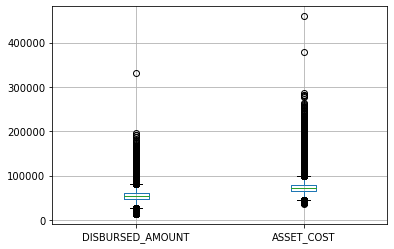

In [25]:
# Create boxplot for all numerical variables

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

boxplot = df.boxplot(column=['DISBURSED_AMOUNT', 'ASSET_COST'])
plt.show()

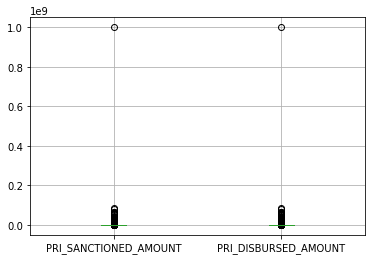

In [27]:
boxplot = df.boxplot(column=['PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT'])
plt.show()

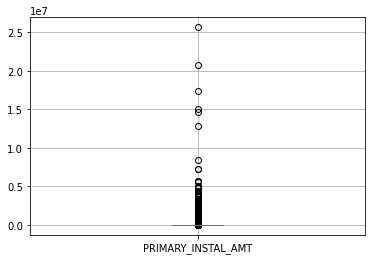

In [29]:
boxplot = df.boxplot(column=['PRIMARY_INSTAL_AMT'])
plt.show()

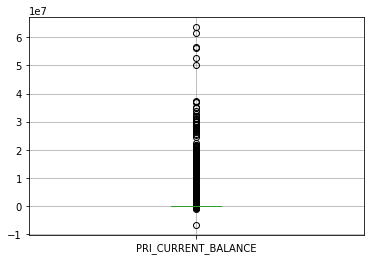

In [31]:
boxplot = df.boxplot(column=['PRI_CURRENT_BALANCE'])
plt.show()

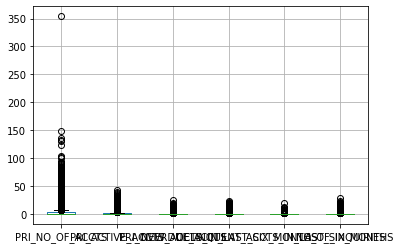

In [33]:
boxplot = df.boxplot(column=['PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
                             'NO_OF_INQUIRIES'])
plt.show()

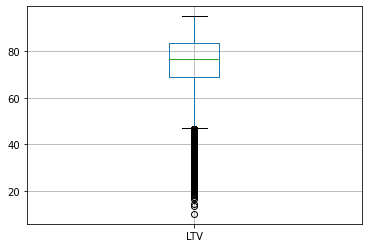

In [34]:
boxplot = df.boxplot(column=['LTV'])
plt.show()

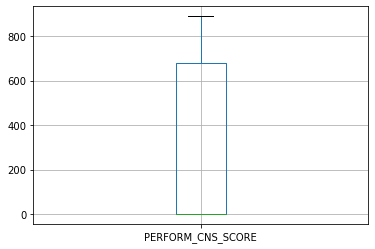

In [35]:
boxplot = df.boxplot(column=['PERFORM_CNS_SCORE'])
plt.show()

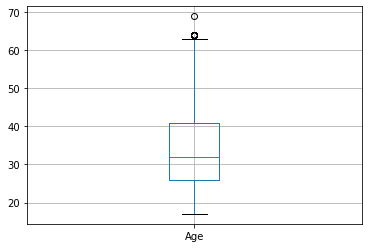

In [36]:
boxplot = df.boxplot(column=['Age'])
plt.show()

In [37]:
# Calculate the flag rate

flag_lst = ['AADHAR_FLAG', 'VOTERID_FLAG']

for col in flag_lst:
    print(col + ": " + str(round(df[col].mean(),3)))

AADHAR_FLAG: 0.84
VOTERID_FLAG: 0.145


In [38]:
# save the data for use in the next step
df.to_csv('milestone_1_data.csv', index=False)

---

In [62]:
# AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH have too many subgroups. Convert them into continuous data type in months

import re

def findyrs(string):
    return re.findall("[0-9]+", string)[0]

def findmon(string):
    return re.findall("[0-9]+", string)[1]

df['AVERAGE_ACCT_AGE_yrs'] = df['AVERAGE_ACCT_AGE'].apply(findyrs).apply(int)
df['AVERAGE_ACCT_AGE_mon'] = df['AVERAGE_ACCT_AGE'].apply(findmon).apply(int)

df['CREDIT_HISTORY_LENGTH_yrs'] = df['CREDIT_HISTORY_LENGTH'].apply(findyrs).apply(int)
df['CREDIT_HISTORY_LENGTH_mon'] = df['CREDIT_HISTORY_LENGTH'].apply(findmon).apply(int)

df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_yrs,AVERAGE_ACCT_AGE_mon,CREDIT_HISTORY_LENGTH_yrs,CREDIT_HISTORY_LENGTH_mon,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,2yrs 3mon,16yrs 10mon,0,0,25,2,3,16,10,2222222222223,16161616161616161616161610
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,1yrs 8mon,4yrs 5mon,0,0,34,1,8,4,5,1111111111118,4444444444445
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,20,0,0,0,0,0000000000000,0000000000000
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0yrs 6mon,2yrs 0mon,0,0,26,0,6,2,0,0000000000006,2222222222220
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,27,0,0,0,0,0000000000000,0000000000000


In [63]:
df['AVERAGE_ACCT_AGE_months'] = 12*df['AVERAGE_ACCT_AGE_yrs']  + df['AVERAGE_ACCT_AGE_mon']
df['CREDIT_HISTORY_LENGTH_months'] = 12*df['CREDIT_HISTORY_LENGTH_yrs'] + df['CREDIT_HISTORY_LENGTH_mon']

df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_yrs,AVERAGE_ACCT_AGE_mon,CREDIT_HISTORY_LENGTH_yrs,CREDIT_HISTORY_LENGTH_mon,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,2yrs 3mon,16yrs 10mon,0,0,25,2,3,16,10,27,202
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,1yrs 8mon,4yrs 5mon,0,0,34,1,8,4,5,20,53
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,20,0,0,0,0,0,0
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0yrs 6mon,2yrs 0mon,0,0,26,0,6,2,0,6,24
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,27,0,0,0,0,0,0


In [64]:
drop_lst = [ 'AVERAGE_ACCT_AGE', 'AVERAGE_ACCT_AGE_yrs', 'AVERAGE_ACCT_AGE_mon', 'CREDIT_HISTORY_LENGTH', 
            'CREDIT_HISTORY_LENGTH_yrs', 'CREDIT_HISTORY_LENGTH_mon']
df.drop(columns = drop_lst, inplace = True)
df.shape

(133154, 25)

In [65]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,0,0,25,27,202
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,34,20,53
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,20,0,0
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0,0,26,6,24
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,27,0,0


In [66]:
df[['AVERAGE_ACCT_AGE_months','CREDIT_HISTORY_LENGTH_months','LOAN_DEFAULT']].corr()

,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months,LOAN_DEFAULT
AVERAGE_ACCT_AGE_months,1.000000,0.830864,-0.081873
CREDIT_HISTORY_LENGTH_months,0.830864,1.000000,-0.085651
LOAN_DEFAULT,-0.081873,-0.085651,1.000000


In [67]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'VOTERID_FLAG',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'AVERAGE_ACCT_AGE_months',
       'CREDIT_HISTORY_LENGTH_months'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     133154 non-null  int64  
 1   ASSET_COST                           133154 non-null  int64  
 2   LTV                                  133154 non-null  float64
 3   BRANCH_ID                            133154 non-null  object 
 4   SUPPLIER_ID                          133154 non-null  object 
 5   EMPLOYMENT_TYPE                      133154 non-null  object 
 6   STATE_ID                             133154 non-null  object 
 7   AADHAR_FLAG                          133154 non-null  int64  
 8   VOTERID_FLAG                         133154 non-null  int64  
 9   PERFORM_CNS_SCORE                    133154 non-null  int64  
 10  PERFORM_CNS_SCORE_DESCRIPTION        133154 non-null  object 
 11  PRI_NO_OF_ACC

In [73]:
(df.BRANCH_ID.value_counts()/len(df)).sort_values(ascending=False)

2      0.056686
67     0.048290
3      0.039969
5      0.039751
36     0.037438
         ...   
261    0.000834
217    0.000698
84     0.000698
111    0.000391
158    0.000248
Name: BRANCH_ID, Length: 82, dtype: float64

In [74]:
(df.SUPPLIER_ID.value_counts()/len(df)).sort_values(ascending=False)

# The population of each SUPPLIER_ID is too small. This variable might not be valuable. 

18317    0.006406
15694    0.005648
17980    0.005400
14234    0.005400
15663    0.005295
           ...   
23753    0.000008
22570    0.000008
24267    0.000008
23741    0.000008
15920    0.000008
Name: SUPPLIER_ID, Length: 2864, dtype: float64

In [76]:
(df.STATE_ID.value_counts()/len(df)).sort_values(ascending=False)

4     0.192589
3     0.146575
6     0.142872
13    0.076175
9     0.069416
8     0.060479
5     0.043566
14    0.040787
1     0.038061
11    0.028989
7     0.028749
18    0.023116
15    0.022185
12    0.017949
2     0.017904
17    0.017153
10    0.015568
16    0.011408
19    0.004604
20    0.000819
21    0.000698
22    0.000338
Name: STATE_ID, dtype: float64

In [81]:
(df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()/len(df)).sort_values(ascending=False)

# too many groups and some of them have very small population. I would regroup them into less groups base on definition.

No Bureau History Available                                0.502861
C-Very Low Risk                                            0.068087
A-Very Low Risk                                            0.060546
D-Very Low Risk                                            0.048583
B-Very Low Risk                                            0.039721
M-Very High Risk                                           0.037085
F-Low Risk                                                 0.036627
K-High Risk                                                0.035305
H-Medium Risk                                              0.029552
E-Low Risk                                                 0.025001
I-Medium Risk                                              0.023477
G-Low Risk                                                 0.016973
J-High Risk                                                0.016102
Not Scored: Sufficient History Not Available               0.016057
Not Scored: Not Enough Info available on the cus

In [78]:
def state_id_map(s):
    if s not in ['4', '3', '6', '13', '9', '8']: 
        return 'Others'
    else: 
        return s

df['STATE_ID_Group'] = df['STATE_ID'].map(state_id_map)
df.head(20)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months,STATE_ID_Group
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,0,0,25,27,202,4
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,34,20,53,4
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,20,0,0,4
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0,0,26,6,24,4
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,27,0,0,6
5,69123,112793,62.95,104,22635,Salaried,10,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,33,0,0,Others
6,44349,56400,80.67,202,23318,Salaried,18,1,0,15,Not Scored: Sufficient History Not Available,2,2,0,11151,15819,15819,0,2,0,0,1,56,33,100,Others
7,44849,60703,76.60,3,14078,Salaried,1,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,1,26,0,0,Others
8,71817,110177,67.16,11,23152,Self employed,3,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,28,0,0,3
9,60963,72178,85.90,146,21980,Self employed,17,1,0,687,E-Low Risk,10,5,0,3242941,3398161,3398161,13107,2,1,0,0,47,9,26,Others


In [82]:
PERFORM_CNS_SCORE_DESCRIPTION_map = {
'A-Very Low Risk':'Very Low Risk',
'B-Very Low Risk':'Very Low Risk',
'C-Very Low Risk':'Very Low Risk',
'D-Very Low Risk':'Very Low Risk',
'E-Low Risk':'Low Risk',
'F-Low Risk':'Low Risk',
'G-Low Risk':'Low Risk',
'H-Medium Risk':'Medium Risk',
'I-Medium Risk':'Medium Risk',
'J-High Risk':'High Risk',
'K-High Risk':'High Risk',
'L-Very High Risk':'Very High Risk',
'M-Very High Risk':'Very High Risk',
'No Bureau History Available':'No Bureau History Available',
'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored',
'Not Scored: No Updates available in last 36 months':'Not Scored',
'Not Scored: Not Enough Info available on the customer':'Not Scored',
'Not Scored: Only a Guarantor':'Not Scored',
'Not Scored: Sufficient History Not Available':'Not Scored'
}

df['PERFORM_CNS_SCORE_DESCRIPTION_new'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].map(PERFORM_CNS_SCORE_DESCRIPTION_map)

df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months,STATE_ID_Group,PERFORM_CNS_SCORE_DESCRIPTION_new
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,0,0,25,27,202,4,Medium Risk
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,34,20,53,4,Very Low Risk
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,20,0,0,4,No Bureau History Available
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0,0,26,6,24,4,Low Risk
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,27,0,0,6,No Bureau History Available


In [87]:
def branch_id_map(s):
    if s not in ['2', '67', '3', '5', '36', '34', '136']: 
        return 'Others'
    else: 
        return s

df['BRANCH_ID_Group'] = df['BRANCH_ID'].map(branch_id_map)
df.head(20)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months,STATE_ID_Group,PERFORM_CNS_SCORE_DESCRIPTION_new,BRANCH_ID_Group
0,65607,78500,85.00,2,22998,Self employed,4,1,0,585,I-Medium Risk,13,4,1,3887803,7028184,7028184,4839,1,1,0,0,25,27,202,4,Medium Risk,2
1,55259,63439,89.85,19,21435,Salaried,4,1,0,741,C-Very Low Risk,5,3,0,1823431,1874823,1874823,0,0,0,0,0,34,20,53,4,Very Low Risk,Others
2,50503,66456,78.55,162,17094,Salaried,4,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,20,0,0,4,No Bureau History Available,Others
3,63513,72500,88.69,2,22070,Salaried,4,1,0,691,E-Low Risk,26,5,0,63507,85939,85939,0,7,0,0,0,26,6,24,4,Low Risk,2
4,42794,60321,72.94,67,18129,Self employed,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,27,0,0,6,No Bureau History Available,67
5,69123,112793,62.95,104,22635,Salaried,10,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,33,0,0,Others,No Bureau History Available,Others
6,44349,56400,80.67,202,23318,Salaried,18,1,0,15,Not Scored: Sufficient History Not Available,2,2,0,11151,15819,15819,0,2,0,0,1,56,33,100,Others,Not Scored,Others
7,44849,60703,76.60,3,14078,Salaried,1,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,1,26,0,0,Others,No Bureau History Available,3
8,71817,110177,67.16,11,23152,Self employed,3,1,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,28,0,0,3,No Bureau History Available,Others
9,60963,72178,85.90,146,21980,Self employed,17,1,0,687,E-Low Risk,10,5,0,3242941,3398161,3398161,13107,2,1,0,0,47,9,26,Others,Low Risk,Others


In [88]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'VOTERID_FLAG',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'AVERAGE_ACCT_AGE_months',
       'CREDIT_HISTORY_LENGTH_months', 'STATE_ID_Group',
       'PERFORM_CNS_SCORE_DESCRIPTION_new', 'BRANCH_ID_Group'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     133154 non-null  int64  
 1   ASSET_COST                           133154 non-null  int64  
 2   LTV                                  133154 non-null  float64
 3   BRANCH_ID                            133154 non-null  object 
 4   SUPPLIER_ID                          133154 non-null  object 
 5   EMPLOYMENT_TYPE                      133154 non-null  object 
 6   STATE_ID                             133154 non-null  object 
 7   AADHAR_FLAG                          133154 non-null  int64  
 8   VOTERID_FLAG                         133154 non-null  int64  
 9   PERFORM_CNS_SCORE                    133154 non-null  int64  
 10  PERFORM_CNS_SCORE_DESCRIPTION        133154 non-null  object 
 11  PRI_NO_OF_ACC

In [90]:
OHE = df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV',
       'EMPLOYMENT_TYPE', 'AADHAR_FLAG', 'VOTERID_FLAG',
       'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'AVERAGE_ACCT_AGE_months',
       'CREDIT_HISTORY_LENGTH_months', 'STATE_ID_Group',
       'PERFORM_CNS_SCORE_DESCRIPTION_new', 'BRANCH_ID_Group']]

H2O = df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'VOTERID_FLAG',
       'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'Age', 'AVERAGE_ACCT_AGE_months',
       'CREDIT_HISTORY_LENGTH_months']]

In [92]:
OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     133154 non-null  int64  
 1   ASSET_COST                           133154 non-null  int64  
 2   LTV                                  133154 non-null  float64
 3   EMPLOYMENT_TYPE                      133154 non-null  object 
 4   AADHAR_FLAG                          133154 non-null  int64  
 5   VOTERID_FLAG                         133154 non-null  int64  
 6   PERFORM_CNS_SCORE                    133154 non-null  int64  
 7   PRI_NO_OF_ACCTS                      133154 non-null  int64  
 8   PRI_ACTIVE_ACCTS                     133154 non-null  int64  
 9   PRI_OVERDUE_ACCTS                    133154 non-null  int64  
 10  PRI_CURRENT_BALANCE                  133154 non-null  int64  
 11  PRI_SANCTIONE

In [94]:
for col in ['EMPLOYMENT_TYPE', 'STATE_ID_Group', 'PERFORM_CNS_SCORE_DESCRIPTION_new', 'BRANCH_ID_Group']:
    dummies = pd.get_dummies(OHE[col], prefix = col)
    OHE = OHE.join(dummies)
    OHE.drop(columns = col, inplace = True)

OHE.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,AADHAR_FLAG,VOTERID_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,Age,AVERAGE_ACCT_AGE_months,CREDIT_HISTORY_LENGTH_months,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,EMPLOYMENT_TYPE_Unknown,STATE_ID_Group_13,STATE_ID_Group_3,STATE_ID_Group_4,STATE_ID_Group_6,STATE_ID_Group_8,STATE_ID_Group_9,STATE_ID_Group_Others,PERFORM_CNS_SCORE_DESCRIPTION_new_High Risk,PERFORM_CNS_SCORE_DESCRIPTION_new_Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_new_Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_new_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_new_Not Scored,PERFORM_CNS_SCORE_DESCRIPTION_new_Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_new_Very Low Risk,BRANCH_ID_Group_136,BRANCH_ID_Group_2,BRANCH_ID_Group_3,BRANCH_ID_Group_34,BRANCH_ID_Group_36,BRANCH_ID_Group_5,BRANCH_ID_Group_67,BRANCH_ID_Group_Others
0,65607,78500,85.00,1,0,585,13,4,1,3887803,7028184,7028184,4839,1,1,0,0,25,27,202,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,55259,63439,89.85,1,0,741,5,3,0,1823431,1874823,1874823,0,0,0,0,0,34,20,53,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,50503,66456,78.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,63513,72500,88.69,1,0,691,26,5,0,63507,85939,85939,0,7,0,0,0,26,6,24,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,42794,60321,72.94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [95]:
OHE.shape

(133154, 45)

In [96]:
OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133154 entries, 0 to 133153
Data columns (total 45 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   DISBURSED_AMOUNT                                               133154 non-null  int64  
 1   ASSET_COST                                                     133154 non-null  int64  
 2   LTV                                                            133154 non-null  float64
 3   AADHAR_FLAG                                                    133154 non-null  int64  
 4   VOTERID_FLAG                                                   133154 non-null  int64  
 5   PERFORM_CNS_SCORE                                              133154 non-null  int64  
 6   PRI_NO_OF_ACCTS                                                133154 non-null  int64  
 7   PRI_ACTIVE_ACCTS                               